In [3]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [4]:
data= pd.read_csv('Advertising.csv') # Reading the data file

In [5]:
data.drop('Unnamed: 0',axis=1,inplace = True)

In [6]:
data

TV  radio  newspaper  sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
5      8.7   48.9       75.0    7.2
6     57.5   32.8       23.5   11.8
7    120.2   19.6       11.6   13.2
8      8.6    2.1        1.0    4.8
9    199.8    2.6       21.2   10.6
10    66.1    5.8       24.2    8.6
11   214.7   24.0        4.0   17.4
12    23.8   35.1       65.9    9.2
13    97.5    7.6        7.2    9.7
14   204.1   32.9       46.0   19.0
15   195.4   47.7       52.9   22.4
16    67.8   36.6      114.0   12.5
17   281.4   39.6       55.8   24.4
18    69.2   20.5       18.3   11.3
19   147.3   23.9       19.1   14.6
20   218.4   27.7       53.4   18.0
21   237.4    5.1       23.5   12.5
22    13.2   15.9       49.6    5.6
23   228.3   16.9       26.2   15.5
24    62.3   12.6       18.3    9.7
25   262.9    3.5       19.5   12.0
26   142.9   29.3       12.6   15.0
27   240.1   16.7       22.9   15.9
28   248.8   27.1       22.9   18.9
29    70.6   16.0       40.8   10.5
..     ...    ...        ...    ...
170   50.0   11.6       18.4    8.4
171  164.5   20.9       47.4   14.5
172   19.6   20.1       17.0    7.6
173  168.4    7.1       12.8   11.7
174  222.4    3.4       13.1   11.5
175  276.9   48.9       41.8   27.0
176  248.4   30.2       20.3   20.2
177  170.2    7.8       35.2   11.7
178  276.7    2.3       23.7   11.8
179  165.6   10.0       17.6   12.6
180  156.6    2.6        8.3   10.5
181  218.5    5.4       27.4   12.2
182   56.2    5.7       29.7    8.7
183  287.6   43.0       71.8   26.2
184  253.8   21.3       30.0   17.6
185  205.0   45.1       19.6   22.6
186  139.5    2.1       26.6   10.3
187  191.1   28.7       18.2   17.3
188  286.0   13.9        3.7   15.9
189   18.7   12.1       23.4    6.7
190   39.5   41.1        5.8   10.8
191   75.5   10.8        6.0    9.9
192   17.2    4.1       31.6    5.9
193  166.8   42.0        3.6   19.6
194  149.7   35.6        6.0   17.3
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]

In [7]:
data.shape

(200, 4)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [9]:
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [10]:
data.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [11]:
data

TV  radio  newspaper  sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
5      8.7   48.9       75.0    7.2
6     57.5   32.8       23.5   11.8
7    120.2   19.6       11.6   13.2
8      8.6    2.1        1.0    4.8
9    199.8    2.6       21.2   10.6
10    66.1    5.8       24.2    8.6
11   214.7   24.0        4.0   17.4
12    23.8   35.1       65.9    9.2
13    97.5    7.6        7.2    9.7
14   204.1   32.9       46.0   19.0
15   195.4   47.7       52.9   22.4
16    67.8   36.6      114.0   12.5
17   281.4   39.6       55.8   24.4
18    69.2   20.5       18.3   11.3
19   147.3   23.9       19.1   14.6
20   218.4   27.7       53.4   18.0
21   237.4    5.1       23.5   12.5
22    13.2   15.9       49.6    5.6
23   228.3   16.9       26.2   15.5
24    62.3   12.6       18.3    9.7
25   262.9    3.5       19.5   12.0
26   142.9   29.3       12.6   15.0
27   240.1   16.7       22.9   15.9
28   248.8   27.1       22.9   18.9
29    70.6   16.0       40.8   10.5
..     ...    ...        ...    ...
170   50.0   11.6       18.4    8.4
171  164.5   20.9       47.4   14.5
172   19.6   20.1       17.0    7.6
173  168.4    7.1       12.8   11.7
174  222.4    3.4       13.1   11.5
175  276.9   48.9       41.8   27.0
176  248.4   30.2       20.3   20.2
177  170.2    7.8       35.2   11.7
178  276.7    2.3       23.7   11.8
179  165.6   10.0       17.6   12.6
180  156.6    2.6        8.3   10.5
181  218.5    5.4       27.4   12.2
182   56.2    5.7       29.7    8.7
183  287.6   43.0       71.8   26.2
184  253.8   21.3       30.0   17.6
185  205.0   45.1       19.6   22.6
186  139.5    2.1       26.6   10.3
187  191.1   28.7       18.2   17.3
188  286.0   13.9        3.7   15.9
189   18.7   12.1       23.4    6.7
190   39.5   41.1        5.8   10.8
191   75.5   10.8        6.0    9.9
192   17.2    4.1       31.6    5.9
193  166.8   42.0        3.6   19.6
194  149.7   35.6        6.0   17.3
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]

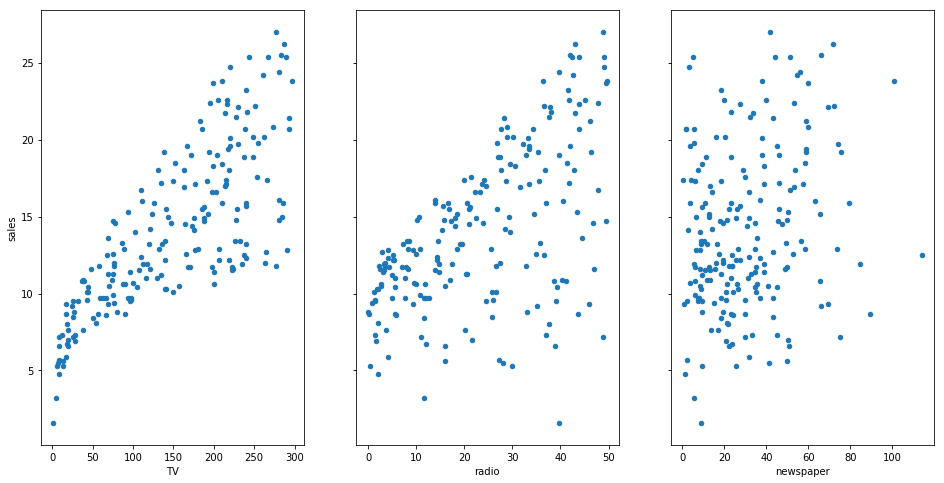

In [12]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

Above chat shows following insights. <br>
There is strong linear relationship between Sales & TV.<br>
There is slight linear relationship between Sales & Radio.<br>
<br>
But it seems that there is no such linear relationship between Sales & Newspaper. When more spending on newspaper, sales will not increase.

In [13]:
from sklearn.linear_model import LinearRegression

# Let's first create model using TV spending only!

# Single Linear Regression

In [20]:
feature_cols = ['TV']
y = data[feature_cols]
x = data['sales']

lm = LinearRegression()
lm.fit(y,x)

print('Intercept is equal to',lm.intercept_)
print('Coeffecient is equal to',lm.coef_)

Intercept is equal to 7.032593549127694
Coeffecient is equal to [0.04753664]


In [21]:
x_new = pd.DataFrame({'TV':[10,10,10,10,10]})
lm.predict(x_new)

array([7.50795995, 7.50795995, 7.50795995, 7.50795995, 7.50795995])

# Check Model Accuracy with R2 and Adjusted R2. 

In [23]:
lm.score(y,x)

0.611875050850071

R2 is 61.18 %. That means model accuracy is 61.18%. But R2 accuracy is not a good approach to identify model's accuracy since it always increase with every new feature. Which should not be a case.

# Let's try to find accuracy with Adjusted R2. 

In [26]:
def adjusted_r2(y,x):
    a = lm.score(x,y)
    N = data.shape[0]
    P = data.shape[1]
    return 1- ((1-a) * (N-1))/(N-P-1)
    

In [27]:
adjusted_r2(x,y)

0.6039135134316109

Adjusted R2 is 60.39 %. That means accuracy is 60.39 %. But we can rely on Adjusted r2 method since this will not increase as per the column size.

# Now we know the accuracy of model, let's also evaluate the statistical summary of regression model

In [28]:
import statsmodels.formula.api as smf
lm_statsmodel = smf.ols(formula = 'sales ~ TV',data=data).fit()
lm_statsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 22 Mar 2021   Prob (F-statistic):           1.47e-42
Time:                        00:31:05   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
p_value = lm_statsmodel.pvalues[1]
print('Null Hypothesis = There is no relationship between TV & Sales.')
print('Alternate Hypothesis = There is relationship between TV & Sales.')

Null Hypothesis = There is no relationship between TV & Sales.
Alternate Hypothesis = There is relationship between TV & Sales.


In [30]:
p_value

1.467389700194655e-42

In [115]:
if p_value < 0.05:
    print('Since Pvalues is less than 0.05, we can simply reject Null Hypothesis, which means there is relationship between TV & Sales.')
else:
    print('Since Pvalues is more than 0.05, we can simply accept Null Hypothesis, which means there is no relationship between TV & Sales')

Since Pvalues is less than 0.05, we can simply reject Null Hypothesis, which means there is relationship between TV & Sales.


### Till now we have done is single linear regression. Below we will do Multiple Linear Regression using 2 or all features! 

In [106]:
feature_cols = ['TV','radio']
x = data[feature_cols]
y = data['sales']

lm = LinearRegression()
lm.fit(x,y)

print('Intercept is equal to',lm.intercept_)
print('Coeffecient is equal to',lm.coef_)

Intercept is equal to 2.9210999124051362
Coeffecient is equal to [0.04575482 0.18799423]


In [108]:
lm.score(x,y)

0.8971942610828956

R2 is 89.71 %. That means model accuracy is 89.71%. But R2 accuracy is not a good approach to identify model's accuracy since it always increase with every new feature. Which should not be a case.

# Let's try to find accuracy with Adjusted R2.  

In [109]:
adjusted_r2(x,y)

0.8950854254128011

Adjusted R2 is 89.50 %. That means accuracy is 89.50 %. But we can rely on Adjusted r2 method since this will not increase as per the column size.

# Now we know the accuracy of model, let's also evaluate the statistical summary of regression model 

In [111]:
import statsmodels.formula.api as smf
lm_statsmodel = smf.ols(formula = 'sales ~ TV+radio',data=data).fit()
lm_statsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sun, 21 Mar 2021   Prob (F-statistic):           4.83e-98
Time:                        00:28:49   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
p_value = lm_statsmodel.pvalues[1]
print('Null Hypothesis = There is no relationship between TV + Radio & Sales.')
print('Alternate Hypothesis = There is relationship between TV + Radio & Sales.')
p_value
if p_value < 0.05:
    print('Since Pvalues is less than 0.05, we can simply reject Null Hypothesis, which means there is relationship between TV & Sales.')
else:
    print('Since Pvalues is more than 0.05, we can simply accept Null Hypothesis, which means there is no relationship between TV & Sales')

Null Hypothesis = There is no relationship between TV + Radio & Sales.
Alternate Hypothesis = There is relationship between TV + Radio & Sales.
Since Pvalues is less than 0.05, we can simply reject Null Hypothesis, which means there is relationship between TV & Sales.


### Let's add one last feature also i.e. Newspaper and try to evaluate whether it will increase accuracy or not! 

In [118]:
feature_cols = ['TV','radio','newspaper']
x = data[feature_cols]
y = data['sales']

lm = LinearRegression()
lm.fit(x,y)

print('Intercept is equal to',lm.intercept_)
print('Coeffecient is equal to',lm.coef_)

Intercept is equal to 2.9388893694594085
Coeffecient is equal to [ 0.04576465  0.18853002 -0.00103749]


In [119]:
lm.score(x,y)

0.8972106381789521

It seems that adding new column i.e. newspaer is not increasing accuracy of model. So by using backward propogation we can simply remove this column from our model.

In [120]:
adjusted_r2(x,y)

0.8951021384492895

Again for adjuster r2, It seems that adding new column i.e. newspaer is not increasing accuracy of model. So by using backward propogation we can simply remove this column from our model.

###  Now we know the accuracy of model, let's also evaluate the statistical summary of regression model 

In [123]:
import statsmodels.formula.api as smf
lm_statsmodel = smf.ols(formula = 'sales ~ TV + radio + newspaper',data=data).fit()
lm_statsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 21 Mar 2021   Prob (F-statistic):           1.58e-96
Time:                        00:42:00   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In above statistical summary it seems that pvalue of newspaper is more than 0.05. Then it means we can reject this feature. Let's also confirm this decision by creating a model using newspaper feature only!

In [124]:
import statsmodels.formula.api as smf
lm_statsmodel = smf.ols(formula = 'sales ~ newspaper',data=data).fit()
lm_statsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Sun, 21 Mar 2021   Prob (F-statistic):            0.00115
Time:                        00:43:53   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What are the things to be learnt from this summary?

- TV and Radio have positive **p-values**, whereas Newspaper has a negative one. Hence, we can reject the null hypothesis for TV and Radio that there is no relation between those features and Sales, but we fail to reject the null hypothesis for Newspaper that there is no relationship between newspaper spends and sales.
- The expenses on bot TV and Radio ads are**positively associated** with Sales, whereas the expense on newspaper ad is **slightly negatively associated** with the Sales.
- This model has a higher value of **R-squared** (0.897) than the previous model, which means that this model explains more variance and provides a better fit to the data than a model that only includes the TV.


# Let's choose second model only, which we have created by using TV & Radio as features. 

In [151]:
feature_cols = ['TV','radio']
x = data[feature_cols]
y = data['sales']

lm = LinearRegression()
lm.fit(x,y)

print('Intercept is equal to',lm.intercept_)
print('Coeffecient is equal to',lm.coef_)

Intercept is equal to 2.9210999124051362
Coeffecient is equal to [0.04575482 0.18799423]


In [166]:
x_new =pd.DataFrame({'TV':[10,10,10],'radio':[20,20,25]})

In [173]:
lm.predict(x_new)

array([7.1385326 , 7.1385326 , 8.07850373])

In [159]:
x_new

TV  radio
0  10     10
1  10     10
2  10     10

### Also let's try to check multicollinearity between features 

In [195]:
from sklearn.preprocessing import StandardScaler 
scaler =StandardScaler()

X_scaled = scaler.fit_transform(x)
X_scaled

array([[ 0.96985227,  0.98152247],
       [-1.19737623,  1.08280781],
       [-1.51615499,  1.52846331],
       [ 0.05204968,  1.21785493],
       [ 0.3941822 , -0.84161366],
       [-1.61540845,  1.73103399],
       [-1.04557682,  0.64390467],
       [-0.31343659, -0.24740632],
       [-1.61657614, -1.42906863],
       [ 0.61604287, -1.39530685],
       [-0.94515567, -1.17923146],
       [ 0.79002835,  0.04969734],
       [-1.4390876 ,  0.79920886],
       [-0.57850171, -1.05768905],
       [ 0.66625345,  0.65065703],
       [ 0.56466461,  1.65000572],
       [-0.92530498,  0.9004942 ],
       [ 1.56887609,  1.10306488],
       [-0.90895735, -0.18663512],
       [ 0.0030068 ,  0.04294498],
       [ 0.8332328 ,  0.29953451],
       [ 1.05509347, -1.22649795],
       [-1.5628625 , -0.4972435 ],
       [ 0.94883389, -0.42971994],
       [-0.98952781, -0.72007125],
       [ 1.35285385, -1.33453565],
       [-0.04837147,  0.40757221],
       [ 1.08662104, -0.44322465],
       [ 1.18820988,

In [197]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that aeach variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = x.columns
vif

VIF Features
0  1.003013       TV
1  1.003013    radio

Here, we have the correlation values for all the features. As a thumb rule, a VIF value greater than 5 means a very severe multicollinearity. We don't any VIF greater than 5 , so we are good to go. 

Great. Let's go ahead and use linear regression and see how good it fits our data.
But first. let's split our data in train and test.